In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://github.com/bipulshahi/Dataset/raw/refs/heads/main/Advertising.csv',
                 index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
df.dtypes

,0
TV,float64
radio,float64
newspaper,float64
sales,float64


In [3]:
df.isna().sum()

,0
TV,0
radio,0
newspaper,0
sales,0


<Axes: >

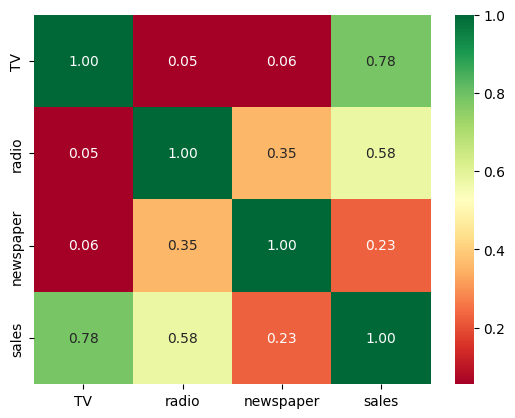

In [6]:
import seaborn as sns
sns.heatmap(df.corr() , annot=True, fmt='.2f' , cmap='RdYlGn')

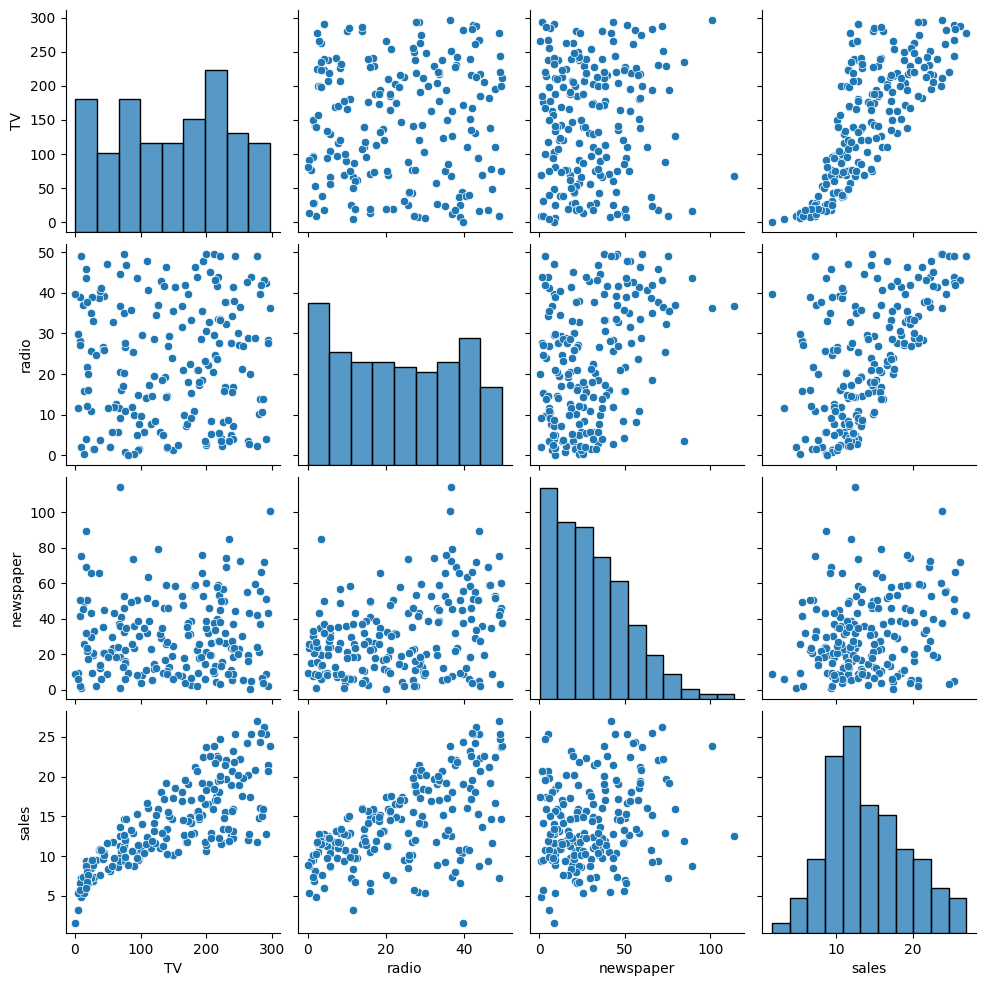

In [7]:
sns.pairplot(df)

In [8]:
X = df[['TV','radio']]
y = df['sales']

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y)

from sklearn.linear_model import LinearRegression
modelA = LinearRegression()

modelA.fit(xtrain,ytrain)

ytrain_pred = modelA.predict(xtrain)
ytest_pred = modelA.predict(xtest)

mae_train = abs(ytrain - ytrain_pred).mean()
mae_test = abs(ytest - ytest_pred).mean()

print("Train mean absolute error" , mae_train)
print("Test mean absolute error" , mae_test)

Train mean absolute error 1.3249344660592852
Test mean absolute error 1.0616597323299897


**Non-Linear Regression**

In [10]:
import matplotlib.pyplot as plt
import numpy as np

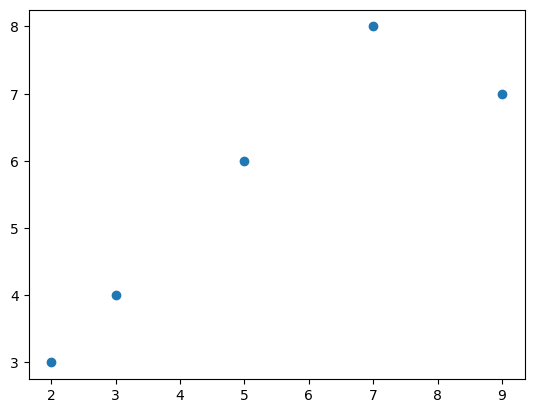

In [13]:
x1 = np.array([3,5,2,7,9]).reshape(5,1)
y1 = np.array([4,6,3,8,7]).reshape(5,1)

plt.scatter(x1,y1)
plt.show()

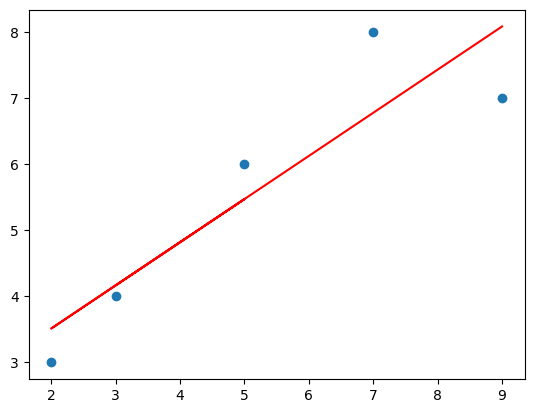

In [18]:
#linearity
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression()
model_linear.fit(x1,y1)

yp1 = model_linear.predict(x1)

plt.scatter(x1,y1)
plt.plot(x1,yp1,'r')
plt.show()

In [19]:
x1 = np.array([3,5,2,7,9]).reshape(5,1)
y1 = np.array([4,6,3,8,7]).reshape(5,1)

In [24]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree = 2, include_bias=False)

pol.fit(x1)

x1_pol = pol.transform(x1)
x1_pol

array([[ 3.,  9.],
       [ 5., 25.],
       [ 2.,  4.],
       [ 7., 49.],
       [ 9., 81.]])

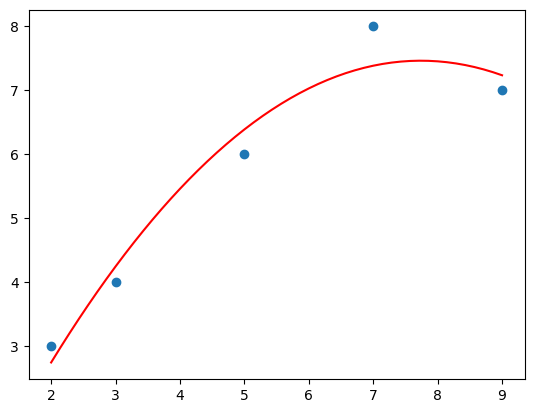

In [27]:
#linearity
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression()

model_linear.fit(x1_pol,y1)

x_new = np.linspace(2,9).reshape(-1,1)
x_new_pol = pol.transform(x_new)
yp1 = model_linear.predict(x_new_pol)

plt.scatter(x1,y1)
plt.plot(x_new,yp1,'r')
plt.show()

In [30]:
#np.linspace(2,9).reshape(-1,1)

In [31]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree = 3, include_bias=False)

pol.fit(x1)

x1_pol_3 = pol.transform(x1)
x1_pol_3

array([[  3.,   9.,  27.],
       [  5.,  25., 125.],
       [  2.,   4.,   8.],
       [  7.,  49., 343.],
       [  9.,  81., 729.]])

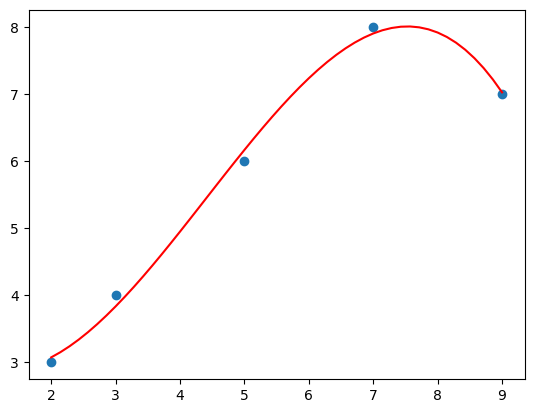

In [32]:
#linearity
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression()

model_linear.fit(x1_pol_3, y1)

x_new = np.linspace(2,9).reshape(-1,1)
x_new_pol = pol.transform(x_new)
yp1 = model_linear.predict(x_new_pol)

plt.scatter(x1,y1)
plt.plot(x_new,yp1,'r')
plt.show()

**Salary dataset**

  * Compare linear and non-linear regression

In [34]:
df_salary = pd.read_csv('https://github.com/bipulshahi/Dataset/raw/refs/heads/main/Salary_dataset.csv', index_col=0)
df_salary.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [42]:
X = df_salary[['YearsExperience']]
y = df_salary['Salary']

In [44]:
#Split into train and test
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y)

#import suitable algorithm to train
from sklearn.linear_model import LinearRegression
model_linear_salary = LinearRegression()

#Define a model to be trained
model_linear_salary.fit(xtrain,ytrain)

#Make the predictions using the trained model
ytrain_pred = model_linear_salary.predict(xtrain)
ytest_pred = model_linear_salary.predict(xtest)

mae_train = abs(ytrain - ytrain_pred).mean()
mae_test = abs(ytest - ytest_pred).mean()
print("Train mean absolute error" , mae_train)
print("Test mean absolute error" , mae_test)

Train mean absolute error 4120.757097973578
Test mean absolute error 6216.86681961465


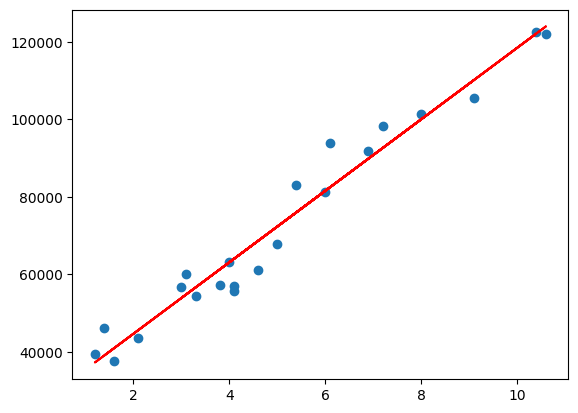

In [45]:
plt.scatter(xtrain,ytrain)
plt.plot(xtrain,ytrain_pred,'r')
plt.show()

**Polynomial Regression**

In [119]:
X = df_salary[['YearsExperience']]
y = df_salary['Salary']

In [49]:
X.shape

(30, 1)

In [127]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=2 , include_bias=False)

pol.fit(X)
X_pol = pol.transform(X)
#print(X_pol.shape)
print(X_pol)

[[  1.2    1.44]
 [  1.4    1.96]
 [  1.6    2.56]
 [  2.1    4.41]
 [  2.3    5.29]
 [  3.     9.  ]
 [  3.1    9.61]
 [  3.3   10.89]
 [  3.3   10.89]
 [  3.8   14.44]
 [  4.    16.  ]
 [  4.1   16.81]
 [  4.1   16.81]
 [  4.2   17.64]
 [  4.6   21.16]
 [  5.    25.  ]
 [  5.2   27.04]
 [  5.4   29.16]
 [  6.    36.  ]
 [  6.1   37.21]
 [  6.9   47.61]
 [  7.2   51.84]
 [  8.    64.  ]
 [  8.3   68.89]
 [  8.8   77.44]
 [  9.1   82.81]
 [  9.6   92.16]
 [  9.7   94.09]
 [ 10.4  108.16]
 [ 10.6  112.36]]


In [128]:
#Split into train and test
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pol,y)

#import suitable algorithm to train
from sklearn.linear_model import LinearRegression
model_non_linear_salary = LinearRegression()

#Define a model to be trained
model_non_linear_salary.fit(xtrain,ytrain)

#Make the predictions using the trained model
ytrain_pred = model_non_linear_salary.predict(xtrain)
ytest_pred = model_non_linear_salary.predict(xtest)

mae_train = abs(ytrain - ytrain_pred).mean()
mae_test = abs(ytest - ytest_pred).mean()
print("Train mean absolute error" , mae_train)
print("Test mean absolute error" , mae_test)

Train mean absolute error 4392.74668288169
Test mean absolute error 5724.406022392487


In [129]:
print(model_non_linear_salary.coef_)

[ 9.18647140e+03 -5.07908904e+00]


In [130]:
print(model_non_linear_salary.intercept_)

27045.200604786376


In [131]:
xtrain[:,0]

array([10.6,  3.3, 10.4,  3.1,  4.6,  8.8,  6.1,  1.4,  6.9,  4.2,  5.4,
        9.1,  7.2,  2.1,  1.6,  3. ,  4. ,  5. ,  3.8,  1.2,  6. ,  4.1])

In [132]:
new_x = np.linspace(xtrain[:,0].min() , xtrain[:,0].max() , 10)
new_x_pol = pol.transform(new_x.reshape(-1,1))
new_y_pred = model_non_linear_salary.predict(new_x_pol)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


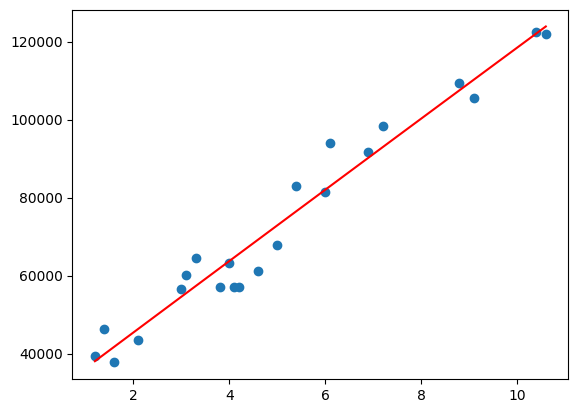

In [133]:
plt.scatter(xtrain[:,0], ytrain)

plt.plot(new_x , new_y_pred , 'r')

plt.show()

**Apply non-linear regression on Advertising data**

In [134]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [141]:
X = df[['TV']]
y = df['sales']

from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree = 3, include_bias=False)

pol.fit(X)

X_pol = pol.transform(X)

In [142]:
print(X_pol.shape)

(200, 3)


In [143]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pol , y)   #creating training data from polynomial transformed data

print(xtrain.shape)

(150, 3)


In [144]:
from sklearn.linear_model import LinearRegression
model_nonLinear_adv = LinearRegression()

model_nonLinear_adv.fit(xtrain,ytrain)

LinearRegression()

In [145]:
ytrainPred = model_nonLinear_adv.predict(xtrain)
ytestPred = model_nonLinear_adv.predict(xtest)

maeTrain = abs(ytrain - ytrainPred).mean()
maeTest = abs(ytest - ytestPred).mean()

print("Mean absolute error, Train" , maeTrain)
print("Mean absolute error, Test" , maeTest)

Mean absolute error, Train 2.6375434630076136
Mean absolute error, Test 2.307666821194594


In [154]:
x_new = np.linspace(xtrain[:,0].min() , xtrain[:,0].max() , 10)

x_new_pol = pol.transform(x_new.reshape(-1,1))

y_ne_pol = model_nonLinear_adv.predict(x_new_pol)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


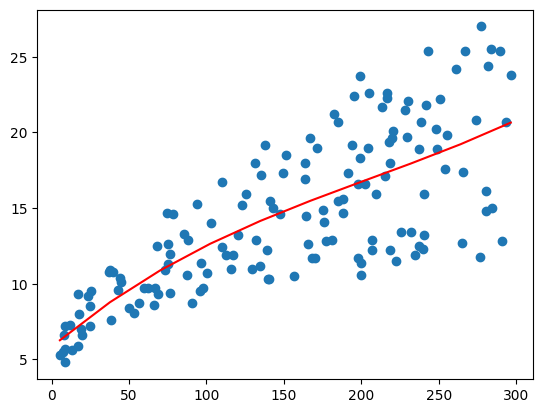

In [156]:
plt.scatter(xtrain[:,0] , ytrain)
plt.plot(x_new,y_ne_pol,'r')
plt.show()

**Non-Linear or Polynomial Regression on multiple features**

In [160]:
x1 = np.array([[3,2,4,5,1] , [2,5,3,6,2]]).reshape(5,2)
x1

array([[3, 2],
       [4, 5],
       [1, 2],
       [5, 3],
       [6, 2]])

In [162]:
from sklearn.preprocessing import PolynomialFeatures
pol =  PolynomialFeatures(degree=2 , include_bias=False)
pol.fit(x1)
pol.transform(x1)

array([[ 3.,  2.,  9.,  6.,  4.],
       [ 4.,  5., 16., 20., 25.],
       [ 1.,  2.,  1.,  2.,  4.],
       [ 5.,  3., 25., 15.,  9.],
       [ 6.,  2., 36., 12.,  4.]])

**For advertising data**

In [163]:
X = df[['TV','radio']]
y = df['sales']
print(X.shape)

(200, 2)


In [164]:
from sklearn.preprocessing import PolynomialFeatures
pol =  PolynomialFeatures(degree=2 , include_bias=False)

pol.fit(X)

X_pol = pol.transform(X)

In [165]:
print(X_pol.shape)

(200, 5)


In [166]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pol , y)   #creating training data from polynomial transformed data

print(xtrain.shape)

(150, 5)


In [167]:
from sklearn.linear_model import LinearRegression
model_multiple_nonLinear_adv = LinearRegression()

model_multiple_nonLinear_adv.fit(xtrain,ytrain)

LinearRegression()

In [168]:
ytrainPred = model_multiple_nonLinear_adv.predict(xtrain)
ytestPred = model_multiple_nonLinear_adv.predict(xtest)

maeTrain = abs(ytrain - ytrainPred).mean()
maeTest = abs(ytest - ytestPred).mean()

print("Mean absolute error, Train" , maeTrain)
print("Mean absolute error, Test" , maeTest)

Mean absolute error, Train 0.401474575984132
Mean absolute error, Test 0.454794864646418


In [172]:
tv = 78.9
radio = 96.2

print(model_multiple_nonLinear_adv.predict([[tv, radio, tv**2, tv*radio, radio**2]]))

[20.66156756]
